In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import psycopg2 as ps
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import seaborn as sns
from pylab import rcParams

In [24]:
%matplotlib inline

In [3]:
db_path = r'D:\OneDrive - Nelson Mandela University\Work_Other\DSI\Module_2\Twist_Bike_london\data\Bike_london.db'
connection = sqlite3.connect(db_path)

In [4]:
#pd.read_sql('''SELECT * FROM main''', connection)

In [5]:
# load the data
df = pd.read_sql('''SELECT * FROM main''', connection)
df['timestamp'] = pd.to_datetime(df.timestamp)
df.index = df.timestamp
df = df.drop(columns = ['ReadingDateTime','timestamp'])

#print(df.shape);
df.head();

# Bikes shared in London from 2015 - 2017

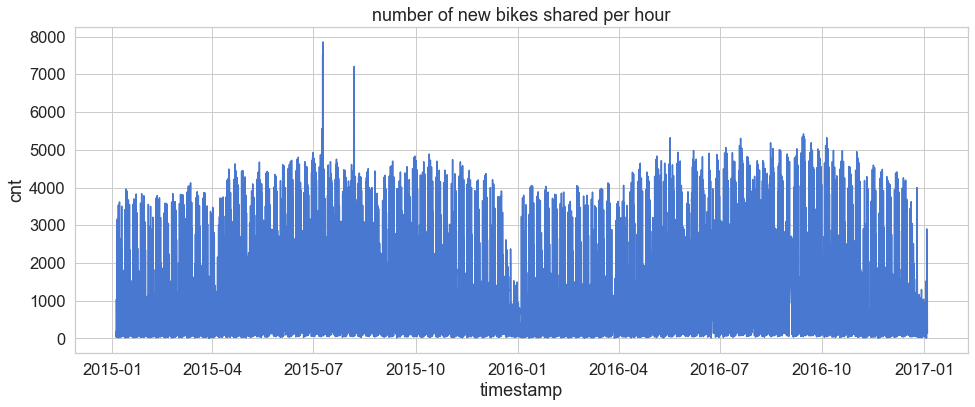

In [6]:
# plot the whole response variable hourly data
plt.figure(figsize=(16,6))
sns.set(font_scale = 1.5, style='whitegrid',palette='muted')
sns.lineplot(x=df.index, y="cnt", data=df).set(title='number of new bikes shared per hour');

In [7]:
# monthly data
# df_by_month = df.resample('M').sum()
# sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month);

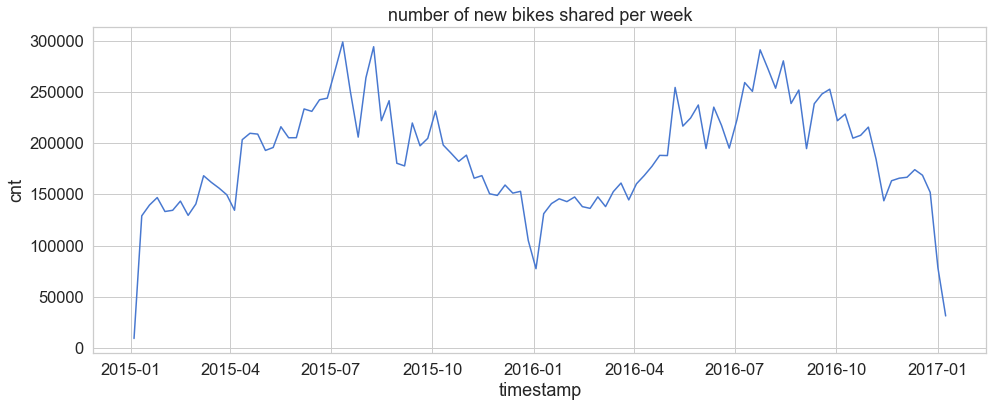

In [35]:
# weekly data
plt.figure(figsize=(16,6))
sns.set(font_scale = 1.5,style='whitegrid',palette='muted')
df_by_week = df.resample('W').sum()
sns.lineplot(x=df_by_week.index, y="cnt", data=df_by_week).set(title='number of new bikes shared per week');

## Rental patterns during the day

In [23]:
def multiplot(widg):
    choices = widg['new']
    #print(choices)
    #data = annual_catch_country.loc[:, choices] if choices else annual_catch_country
   #data = df
    #print(data.shape())
    #print(data)
    output.clear_output(wait=True)
    with output:
        if choices == 'overall':
            plt.figure(figsize=(18,8))
            sns.set(font_scale = 1.5,style='whitegrid',palette='muted')
            sns.pointplot(x = 'hour', y = 'cnt', data=df)
            plt.show()
        else:
            plt.figure(figsize=(18,8))
            sns.set(font_scale = 1.5,style='whitegrid',palette='muted')
            sns.pointplot(x = 'hour', y = 'cnt', data=df, hue = choices )
            plt.show()       

#opts = annual_catch_country.columns.values
opts = ['overall','is_holiday', 'is_weekend', 'season']


selector = widgets.Dropdown(
                options=opts,
                #value=[opts[0]],
                #rows=len(opts),
                description='choose',
                disabled=False)

output = widgets.Output()

selector.observe(multiplot, names='value')
display(selector)
display(output)

Dropdown(description='choose', options=('overall', 'is_holiday', 'is_weekend', 'season'), value='overall')

Output()

## Rental patterns during the week

In [25]:
#plt.figure(figsize=(18,8))
def multiplot(widg):
    choices = widg['new']
    #print(choices)
    #data = annual_catch_country.loc[:, choices] if choices else annual_catch_country
   #data = df
    #print(data.shape())
    #print(data)
    output.clear_output(wait=True)
    with output:
        if choices == 'overall':
            plt.figure(figsize=(18,8))
            sns.set(font_scale = 1.5,style='whitegrid',palette='muted')
            sns.pointplot(x = 'day_week', y = 'cnt', data=df)
            plt.show()
        else:
            plt.figure(figsize=(18,8))
            sns.set(font_scale = 1.5,style='whitegrid',palette='muted')
            sns.pointplot(x = 'day_week', y = 'cnt', data=df, hue = choices )
            plt.show()       

#opts = annual_catch_country.columns.values
opts = ['overall','is_holiday', 'is_weekend', 'season']


selector = widgets.Dropdown(
                options=opts,
                #value=[opts[0]],
                #rows=len(opts),
                description='choose',
                disabled=False)

output = widgets.Output()

selector.observe(multiplot, names='value')
display(selector)
display(output)

Dropdown(description='choose', options=('overall', 'is_holiday', 'is_weekend', 'season'), value='overall')

Output()

In [11]:
# try to load the model but issues

In [12]:
# import os
# path_model = r'D:\OneDrive - Nelson Mandela University\Work_Other\DSI\Module_2\Twist_Bike_london\model_training'
# os.chdir(path_model)
# #os.getcwdb()

In [13]:
# import tensorflow as tf
# from tensorflow import keras
#model = keras.models.load_model('Bike_model_pred')

In [14]:
model_pred = pd.read_csv('model_training\model_prediction.csv')
model_pred = model_pred.drop(columns = ['Unnamed: 0'])
model_pred.head();

# Prediction of bike in the future

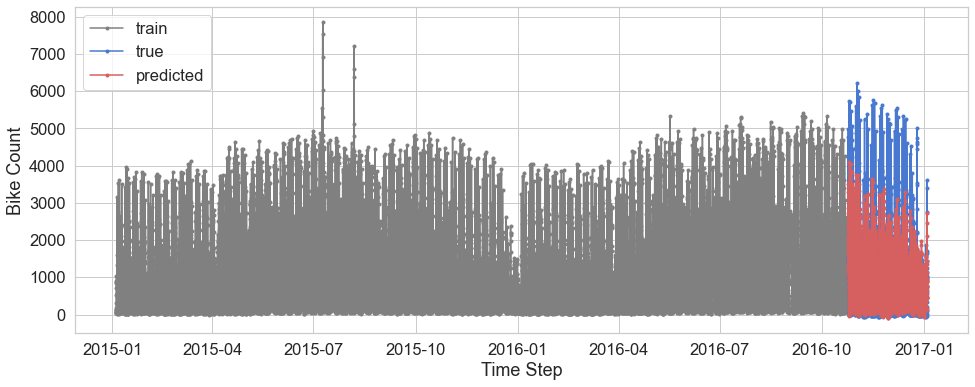

In [50]:
plt.figure(figsize=(16,6))
plt.plot(df.cnt.iloc[0:-len(model_pred.cnt_pred)], marker = '.', color = 'grey', label = 'train')
plt.plot(df.index[-len(model_pred.cnt_pred):], model_pred.cnt_test, marker = '.', label = 'true')
plt.plot(df.index[-len(model_pred.cnt_pred):], model_pred.cnt_pred, marker = '.', color = 'r', label = 'predicted')

#plt.plot(model_pred.cnt_test, marker = '.', label = 'true')
#plt.plot(model_pred.cnt_pred, marker = '.', color = 'r', label = 'predicted')
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()

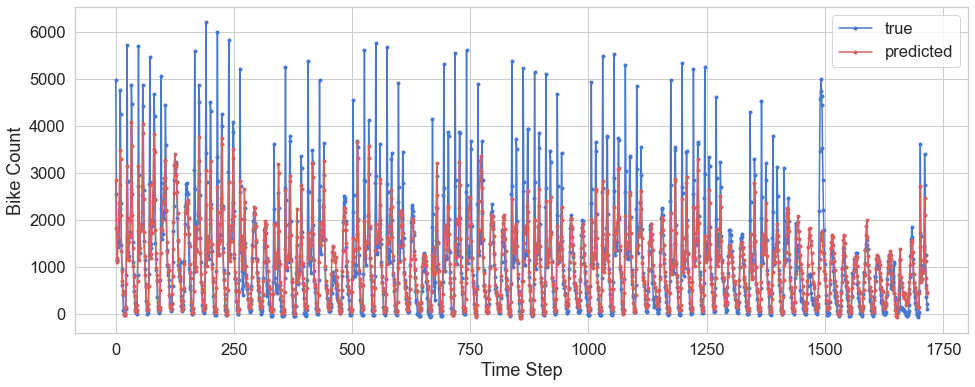

In [15]:
# plot the whole response variable hourly data
plt.figure(figsize=(16,6))
plt.plot(model_pred.cnt_test, marker = '.', label = 'true')
plt.plot(model_pred.cnt_pred, marker = '.', color = 'r', label = 'predicted')
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()

## Correlation between rental and environment conditions

In [ ]:
# simple correlation 

In [16]:
# def multiplot(widg):
#     choices = widg['new']
#     output.clear_output(wait=True)
#     with output:
#         plt.figure(figsize=(8,8))
#         sns.set(font_scale = 1.5,style='whitegrid',palette='muted')
#         sns.scatterplot(x = choices, y = 'cnt', data=df);
#         plt.show()
        
# opts = list(df.columns.values)


# selector = widgets.Dropdown(
#                 options=opts,
#                 #value=[opts[0]],
#                 #rows=len(opts),
#                 description='choose X',
#                 disabled=False)



# output = widgets.Output()

# selector.observe(multiplot, names='value')
# display(selector)
# display(output)

Dropdown(description='choose X', options=('cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday'…

Output()

### weekly changes in bikes shared and environmental conditions

In [33]:


def multiplot(widg):
    choices = widg['new']
    output.clear_output(wait=True)
    with output:
        plt.figure(figsize=(18,8))
        sns.set(font_scale = 1.5,style='whitegrid',palette='muted')
        #ns.scatterplot(x = choices, y = 'cnt', data=df);
        
        g = sns.lineplot(x=df_by_week.index, y="cnt", data=df_by_week)
        sns.lineplot(x=df_by_week.index, y=choices, data=df_by_week,color ='orange', ax=g.axes.twinx());
        plt.show()



df_by_week = df.resample('W').sum()        
opts = list(df_by_week.columns.values)


selector = widgets.Dropdown(
                options=opts,
                #value=[opts[0]],
                #rows=len(opts),
                description='choose X',
                disabled=False)



output = widgets.Output()

selector.observe(multiplot, names='value')
display(selector)
display(output)

Dropdown(description='choose X', options=('cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday'…

Output()

### hourly changes in bikes shared and environmental conditions

In [34]:
def multiplot(widg):
    choices = widg['new']
    output.clear_output(wait=True)
    with output:
        plt.figure(figsize=(18,8))
        sns.set(font_scale = 1.5,style='whitegrid',palette='muted')
        #ns.scatterplot(x = choices, y = 'cnt', data=df);
        
        g = sns.lineplot(x=df_by_hour.index, y="cnt", data=df_by_hour)
        sns.lineplot(x=df_by_hour.index, y=choices, data=df_by_hour,color ='orange', ax=g.axes.twinx());
        plt.show()



df_by_hour = df.groupby('hour').mean()        
opts = list(df_by_hour.columns.values)


selector = widgets.Dropdown(
                options=opts,
                #value=[opts[0]],
                #rows=len(opts),
                description='choose X',
                disabled=False)



output = widgets.Output()

selector.observe(multiplot, names='value')
display(selector)
display(output)

Dropdown(description='choose X', options=('cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday'…

Output()

##### Contains OS data © Crown copyright and database rights 2016' and Geomni UK Map data © and database rights [2019]